# 3. 색상 팔레트 추출 

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import ast
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

c:\Users\jys72\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 3-1. 최종 데이터 프레임 확인하기

In [3]:
# 최종 데이터 프레임 확인하기 
result_dataframe=pd.read_csv('최종241102.csv')
result_dataframe

,TOP_RGB,BOTTOM_RGB
0,"(102, 106, 107)","(103, 112, 119)"
1,"(119, 149, 197)","(74, 99, 108)"
2,"(133, 107, 96)","(56, 67, 70)"
3,"(136, 133, 131)","(27, 30, 29)"
4,"(25, 29, 23)","(52, 57, 52)"
...,...,...
1067,"(68, 76, 83)","(49, 51, 50)"
1068,"(32, 47, 60)","(60, 78, 86)"
1069,"(41, 87, 173)","(177, 191, 204)"
1070,"(81, 81, 74)","(70, 79, 72)"


## 3-2.상의 RGB 값을 기반으로 K-means 클러스터링 하기

In [4]:
# 1. TOP_RGB 문자열을 튜플로 변환
result_dataframe['TOP_RGB'] = result_dataframe['TOP_RGB'].apply(ast.literal_eval)

# 변환 확인
print("TOP_RGB 컬럼 변환 후 샘플 데이터:")
print(result_dataframe['TOP_RGB'].head())  # 튜플 형식으로 변환되었는지 확인

# 2. TOP_RGB 컬럼에서 RGB 값을 추출하여 데이터프레임 생성
top_rgb_values = pd.DataFrame(result_dataframe['TOP_RGB'].tolist(), columns=['R', 'G', 'B'])

# 데이터프레임 생성 확인
print("top_rgb_values 데이터프레임 샘플:")
print(top_rgb_values.head())

# 3. KMeans 모델 생성 및 클러스터링 수행
  # 원하는 클러스터 수 설정
kmeans = KMeans(n_clusters=200, random_state=42)
clusters = kmeans.fit_predict(top_rgb_values)

# 클러스터 결과를 원본 데이터에 추가
result_dataframe['Top_RGB_Cluster'] = clusters

# 4. top_rgb_values와 result_dataframe을 합치기
final_result = pd.concat([result_dataframe, top_rgb_values], axis=1)

# 5. 각 클러스터의 가장 빈도가 높은 RGB 색상 찾기
def get_most_frequent_color(group):
    # RGB 값을 리스트로 변환
    rgb_values = group[['R', 'G', 'B']].values
    # 각 색상에 대한 빈도 계산
    color_counts = pd.Series([tuple(color) for color in rgb_values]).value_counts()
    # 가장 빈도가 높은 색상 반환
    return color_counts.idxmax()

# 클러스터별로 가장 빈도가 높은 색상 찾기
representative_colors = final_result.groupby('Top_RGB_Cluster').apply(get_most_frequent_color).reset_index()

# 컬럼 이름 변경
representative_colors.columns = ['Top_RGB_Cluster', 'Representative_Color']

# 최종 결과에 대표 색상 추가
final_result = final_result.merge(representative_colors, on='Top_RGB_Cluster', how='left')

# 결과 출력
print("최종 결과 샘플:")
print(final_result[['TOP_RGB','BOTTOM_RGB', 'Top_RGB_Cluster', 'Representative_Color']].head())


TOP_RGB 컬럼 변환 후 샘플 데이터:
0    (102, 106, 107)
1    (119, 149, 197)
2     (133, 107, 96)
3    (136, 133, 131)
4       (25, 29, 23)
Name: TOP_RGB, dtype: object
top_rgb_values 데이터프레임 샘플:
     R    G    B
0  102  106  107
1  119  149  197
2  133  107   96
3  136  133  131
4   25   29   23
최종 결과 샘플:
           TOP_RGB       BOTTOM_RGB  Top_RGB_Cluster Representative_Color
0  (102, 106, 107)  (103, 112, 119)              127      (102, 106, 107)
1  (119, 149, 197)    (74, 99, 108)               39      (119, 149, 197)
2   (133, 107, 96)     (56, 67, 70)              167       (133, 107, 96)
3  (136, 133, 131)     (27, 30, 29)               35      (136, 133, 131)
4     (25, 29, 23)     (52, 57, 52)              172         (25, 29, 23)


C:\Users\jys72\AppData\Local\Temp\ipykernel_29460\1433841250.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  representative_colors = final_result.groupby('Top_RGB_Cluster').apply(get_most_frequent_color).reset_index()


In [5]:
# BOTTOM_RGB 컬럼을 튜플로 변환
final_result['BOTTOM_RGB'] = final_result['BOTTOM_RGB'].apply(ast.literal_eval)

# 클러스터별로 BOTTOM_RGB 값을 리스트로 모으기
bottom_rgb_lists = (
    final_result.groupby(['Top_RGB_Cluster','Representative_Color'])['BOTTOM_RGB']
    .apply(lambda x: list(x))
    .reset_index()
)

# 컬럼 이름 지정
bottom_rgb_lists.columns = ['Top_RGB_Cluster','Representative_Color' ,'Bottom_RGB_List']

# 최종 결과 확인
print("클러스터별 BOTTOM_RGB 리스트:")
print(bottom_rgb_lists)


클러스터별 BOTTOM_RGB 리스트:
     Top_RGB_Cluster Representative_Color  \
0                  0         (82, 86, 90)   
1                  1      (148, 150, 149)   
2                  2         (32, 41, 40)   
3                  3      (186, 199, 201)   
4                  4      (119, 117, 104)   
..               ...                  ...   
195              195         (12, 21, 25)   
196              196         (98, 66, 46)   
197              197         (63, 17, 19)   
198              198      (119, 114, 117)   
199              199      (160, 156, 148)   

                                       Bottom_RGB_List  
0    [(13, 18, 18), (33, 37, 34), (107, 104, 91), (...  
1    [(11, 14, 10), (62, 88, 108), (39, 42, 38), (1...  
2    [(129, 142, 145), (33, 46, 52), (136, 143, 141...  
3    [(16, 24, 25), (194, 197, 191), (17, 23, 16), ...  
4    [(9, 25, 15), (26, 33, 38), (107, 109, 110), (...  
..                                                 ...  
195  [(31, 42, 49), (36, 39, 38), (160

## 3-3. 상의 RGB 클러스터링 시각화하기

C:\Users\jys72\AppData\Local\Temp\ipykernel_33856\910725000.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set3', num_clusters)  # HSV 팔레트로 컬러맵 생성


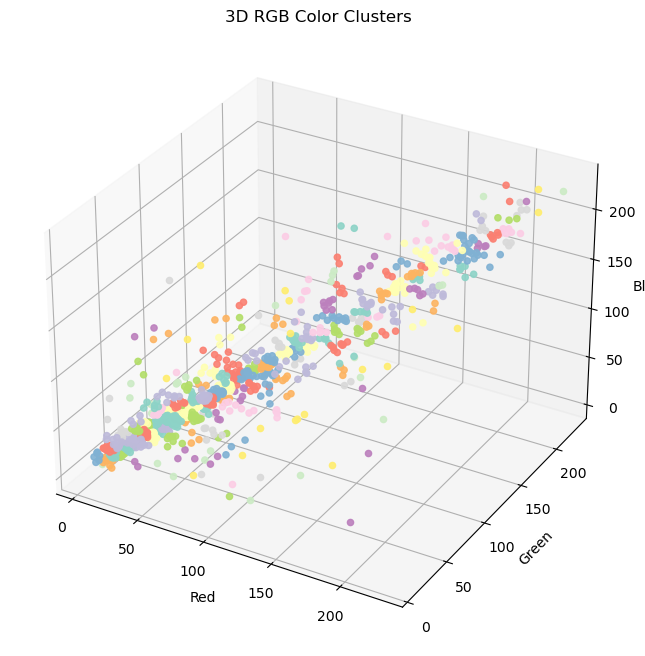

In [ ]:
# 3차원 RGB 클러스터 시각화
def plot_rgb_clusters_3d(final_result):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 클러스터 색상을 HSV 색상 팔레트를 사용하여 구분
    num_clusters = len(final_result['Top_RGB_Cluster'].unique())
    colors = cm.get_cmap('Set3', num_clusters)  # HSV 팔레트로 컬러맵 생성
    
    # 각 클러스터별 색상 산포도 그래프 그리기
    for i, cluster in enumerate(final_result['Top_RGB_Cluster'].unique()):
        cluster_data = final_result[final_result['Top_RGB_Cluster'] == cluster]
        ax.scatter(
            cluster_data['R'],
            cluster_data['G'],
            cluster_data['B'],
            color=colors(i),  # 컬러맵에서 고유 색상 할당
            label=f'Cluster {cluster}',
            s=20, alpha=0.9
        )
    
    # 축 라벨 설정
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('3D RGB Color Clusters')
    # plt.legend(loc='upper right', fontsize='small')
    plt.show()

# 3차원 클러스터 시각화 호출
plot_rgb_clusters_3d(final_result)


In [ ]:
# 중간 저장 데이터 불러오기
#bottom_rgb_lists=pd.read_csv('bottom_rgb_list.csv')

In [31]:
bottom_rgb_lists

,Top_RGB_Cluster,Representative_Color,Bottom_RGB_List
0,0,"(82, 86, 90)","[(13, 18, 18), (33, 37, 34), (107, 104, 91), (..."
1,1,"(148, 150, 149)","[(11, 14, 10), (62, 88, 108), (39, 42, 38), (1..."
2,2,"(32, 41, 40)","[(129, 142, 145), (33, 46, 52), (136, 143, 141..."
3,3,"(186, 199, 201)","[(16, 24, 25), (194, 197, 191), (17, 23, 16), ..."
4,4,"(119, 117, 104)","[(9, 25, 15), (26, 33, 38), (107, 109, 110), (..."
...,...,...,...
195,195,"(12, 21, 25)","[(31, 42, 49), (36, 39, 38), (160, 155, 134), ..."
196,196,"(98, 66, 46)","[(55, 58, 48)]"
197,197,"(63, 17, 19)","[(39, 47, 44)]"
198,198,"(119, 114, 117)","[(201, 197, 196), (46, 50, 46), (148, 154, 151..."


## 3-4.하의 색상 팔레트 시각화하기

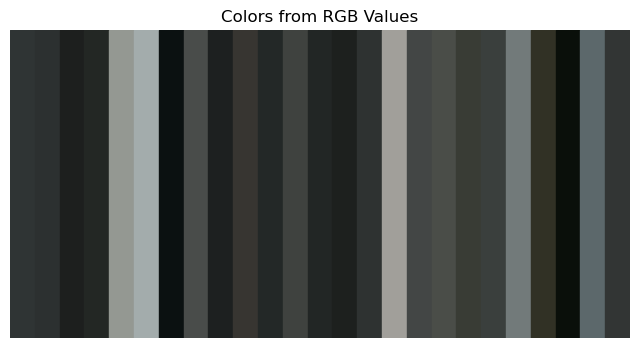

In [35]:

# 예시 RGB 값 리스트
# bottom_rgb_lists['Bottom_RGB_List'] = bottom_rgb_lists['Bottom_RGB_List'].apply(ast.literal_eval)
rgb_list = bottom_rgb_lists['Bottom_RGB_List'][15]
# 색상 시각화
fig, ax = plt.subplots(figsize=(8, 4))

# 각 RGB 값을 색상으로 변환하여 시각화
for i, rgb in enumerate(rgb_list):
    color = [x / 255.0 for x in rgb]  # RGB 값을 0~1 범위로 정규화
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# 축 설정
ax.set_xlim(0, len(rgb_list))
ax.set_ylim(0, 1)
ax.axis('off')  # 축 숨기기

# 제목 설정
plt.title('Colors from RGB Values')
plt.show()



## 3-5.상의 색상 시각화하기 

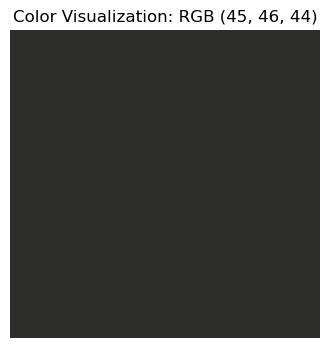

In [39]:
import matplotlib.pyplot as plt

rgb_color = bottom_rgb_lists['Representative_Color'][15]  # RGB 색상 값 가져오기

fig, ax = plt.subplots(figsize=(4, 4))

    # RGB 값을 0~1 범위로 정규화
color = [x / 255.0 for x in rgb_color]

    # 사각형 추가
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=color))

    # 축 설정
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')  # 축 숨기기

    # 제목 설정
plt.title(f'Color Visualization: RGB {rgb_color}')
plt.show()  # 각 색상 시각화 표시
